In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')
sns.set(palette='viridis')

In [3]:
car = pd.read_csv('car sales.csv')
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
car.shape

(23906, 16)

In [6]:
car.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [7]:
car.duplicated().sum()

0

In [8]:
car.index = pd.to_datetime(car['Date'])
car = car.drop('Date',axis=1)
car.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23906 entries, 2022-01-02 to 2023-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Dealer_No      23906 non-null  object
 12  Body Style     23906 non-null  object
 13  Phone          23906 non-null  int64 
 14  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.9+ MB


### EDA

In [9]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


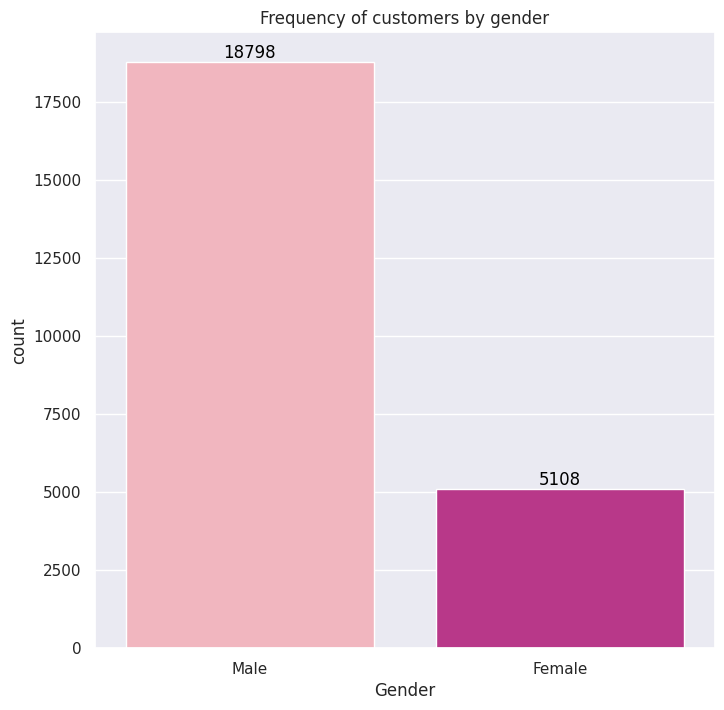

In [10]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Gender',hue='Gender',
    palette='RdPu', data=car)
for container in ax.containers:
   ax.bar_label(container,color='k')
plt.title('Frequency of customers by gender')
plt.show()

##### 78.6% of our customers are male, 21.4% female

In [11]:
car.groupby('Gender').size()

Gender
Female     5108
Male      18798
dtype: int64

In [12]:
car.Gender.value_counts(normalize=True)

Gender
Male      0.78633
Female    0.21367
Name: proportion, dtype: float64

In [13]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


### Proportion of vehicle sold by type

In [14]:
body = car['Body Style'].value_counts(normalize=True)\
 .reset_index()
body

,Body Style,proportion
0,SUV,0.266628
1,Hatchback,0.256337
2,Sedan,0.187735
3,Passenger,0.165021
4,Hardtop,0.124278


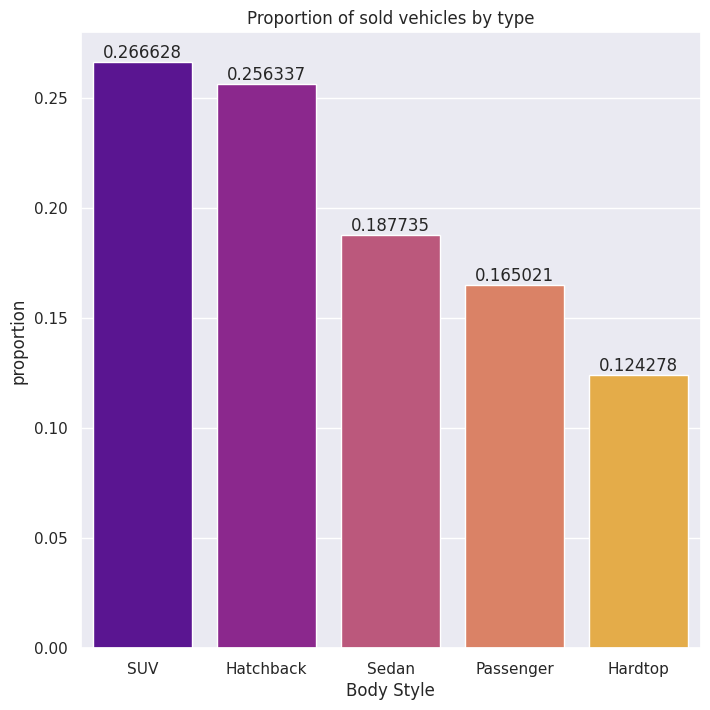

In [15]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x='Body Style', y='proportion',\
 palette='plasma', hue='Body Style', data=body)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Proportion of sold vehicles by type')
plt.show()

##### SUVs are the top choice of their customers followed by hatchback then sedans

In [16]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


### Which dealership made the most sales

In [41]:
deal = car.Dealer_Name.value_counts().\
reset_index()
deal[:5]
#top 5

,Dealer_Name,count
0,Progressive Shippers Cooperative Association No,1318
1,Rabun Used Car Sales,1313
2,Race Car Help,1253
3,Saab-Belle Dodge,1251
4,Star Enterprises Inc,1249


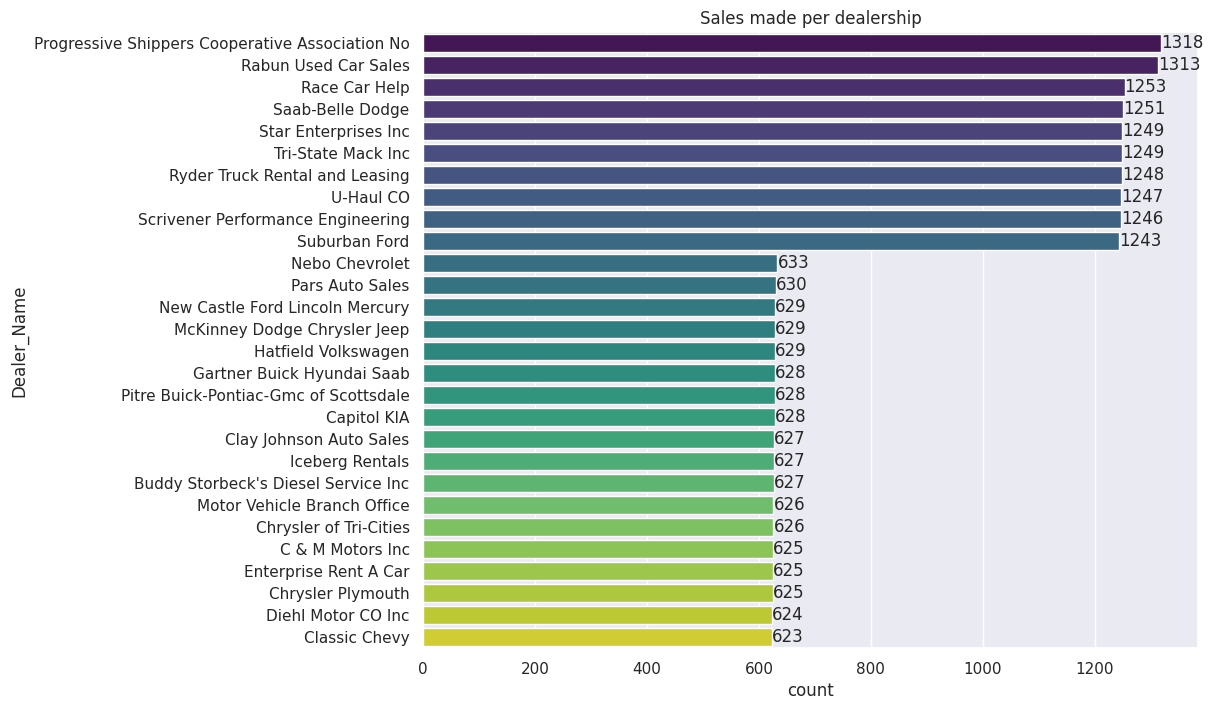

In [18]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='count', y='Dealer_Name',
 hue='Dealer_Name',data=deal, 
           palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sales made per dealership')
plt.show()

In [19]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


### Most preferred car manufacturer 

In [20]:
man = car.Company.value_counts().nlargest(12)
man = man.reset_index()
man

,Company,count
0,Chevrolet,1819
1,Dodge,1671
2,Ford,1614
3,Volkswagen,1333
4,Mercedes-B,1285
5,Mitsubishi,1277
6,Chrysler,1120
7,Oldsmobile,1111
8,Toyota,1110
9,Nissan,886


/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/matplotlib/bezier.py:215: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


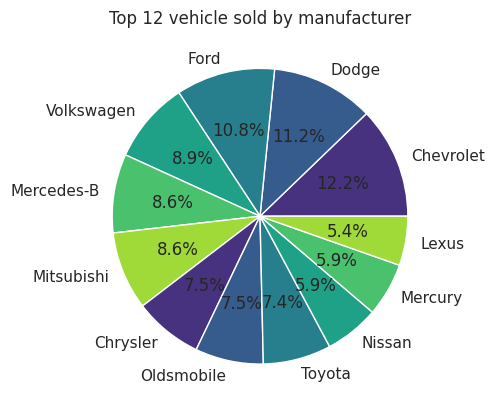

In [21]:
plt.pie(man['count'], labels=man['Company'],
        autopct='%.1f%%' )
sns.set(palette='husl')
plt.title('Top 12 vehicle sold by manufacturer')
plt.show()

### Most preferred car model

In [22]:
mod = car.Model.value_counts().nlargest(12)
mod = mod.reset_index()
mod

,Model,count
0,Diamante,418
1,Silhouette,411
2,Prizm,411
3,Passat,391
4,Ram Pickup,383
5,Jetta,382
6,RL,372
7,LS400,354
8,LHS,330
9,A6,329


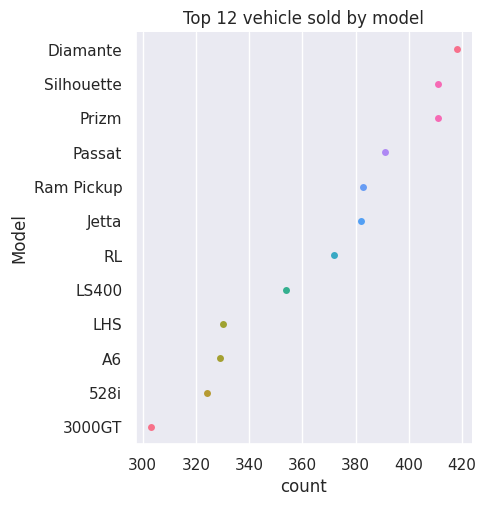

In [23]:
sns.catplot(x='count',y='Model',\
  palette='husl',hue='count',  legend=False,\
            data=mod)
plt.title('Top 12 vehicle sold by model')
plt.show()

In [24]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


### Units sold by manufacturer/color/gender

##### filter 'car' to only contain the top 8 car manufacturer by vehicles sold

In [25]:
fil = car.Company.value_counts().nlargest(8)
bool = car['Company'].isin(fil.index)
topMan = car[bool]
topMan.head(3)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
2022-01-02,C_CND_000002,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2022-01-02,C_CND_000006,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale


<Figure size 800x1000 with 0 Axes>

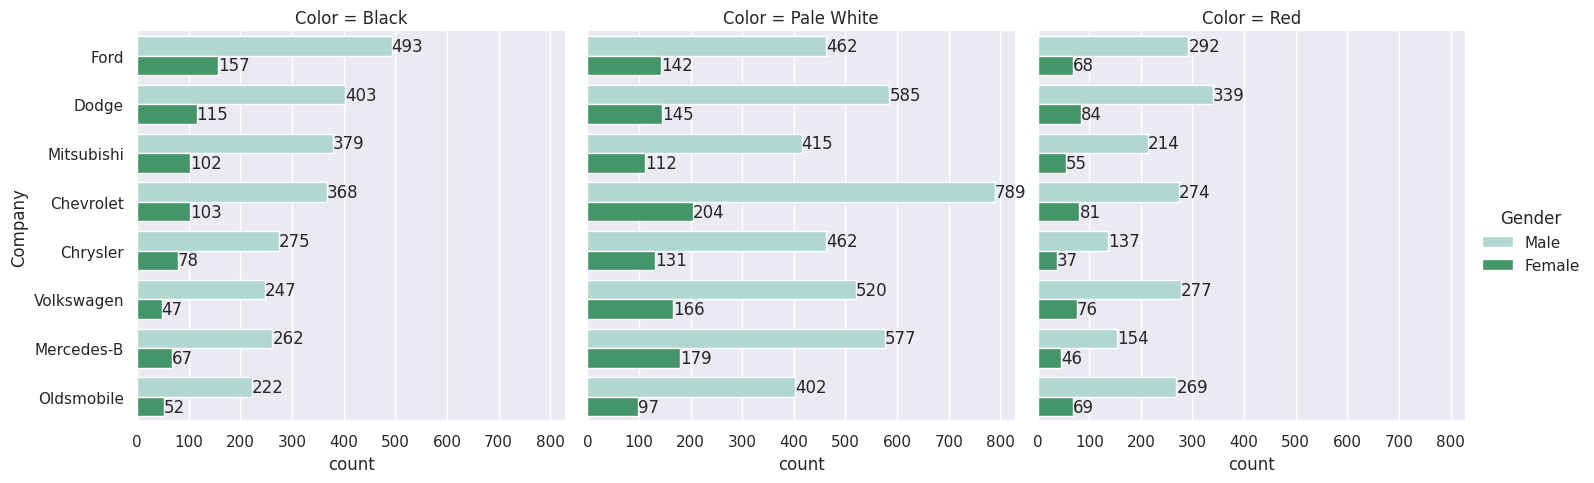

In [26]:
plt.figure(figsize=(8,10))

g=sns.catplot(y='Company', hue='Gender',
             kind='count',
     col='Color',  palette='BuGn',
              data=topMan)
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins()
#plt.title('Vehicles sold by top manufacturers, \
#color, and gender')
plt.show()

##### top choice for both male and female customers is a pale white Chevrolet

In [27]:
topMan.groupby(['Company', 'Color',\
               'Gender']).size()

Company     Color       Gender
Chevrolet   Black       Female    103
                        Male      368
            Pale White  Female    204
                        Male      789
            Red         Female     81
                        Male      274
Chrysler    Black       Female     78
                        Male      275
            Pale White  Female    131
                        Male      462
            Red         Female     37
                        Male      137
Dodge       Black       Female    115
                        Male      403
            Pale White  Female    145
                        Male      585
            Red         Female     84
                        Male      339
Ford        Black       Female    157
                        Male      493
            Pale White  Female    142
                        Male      462
            Red         Female     68
                        Male      292
Mercedes-B  Black       Female     67
                   

#### Color preference by gender

In [28]:
car[car['Gender']=='Female']['Color']\
.value_counts(normalize=True)

Color
Pale White    0.479248
Black         0.323610
Red           0.197142
Name: proportion, dtype: float64

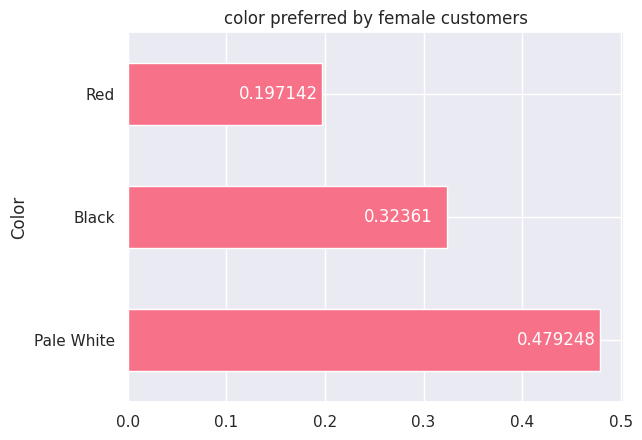

In [29]:
ax=car.query("Gender =='Female'")['Color']\
.value_counts(normalize=True).plot.barh()
for container in ax.containers:
    ax.bar_label(container, padding=-60,
                color='w')
plt.title('color preferred by female customers')
plt.show()

##### around half of female customers preferred pale white, about a third black and the remaining red

In [30]:
car[car['Gender']=='Male']['Color'].\
value_counts(normalize=True)

Color
Pale White    0.468560
Black         0.330035
Red           0.201404
Name: proportion, dtype: float64

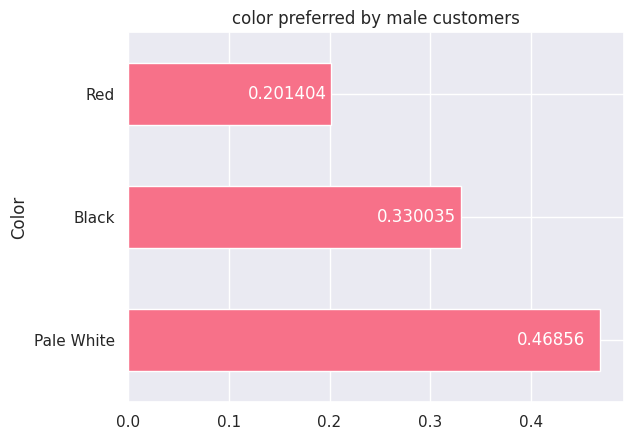

In [31]:
ax=car.query("Gender=='Male'")['Color']\
.value_counts(normalize=True).plot.barh()
for container in ax.containers:
    ax.bar_label(container, padding=-60,
                color='w')
plt.title('color preferred by male customers')
plt.show()

##### Male preference in color about the same as that of female cs

In [32]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown


#### Number of units sold by gender/transmission 

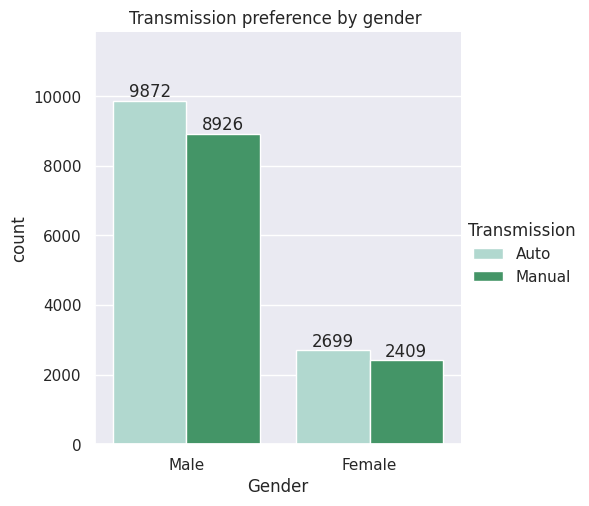

In [33]:
g=sns.catplot(hue='Transmission', x='Gender',
             kind='count',  palette='BuGn',
              data=car)
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)
plt.title('Transmission preference by gender ')
plt.show()

In [34]:
tra = car.groupby(['Gender', 'Transmission'])\
.size().reset_index()
tra = tra.rename(columns={0:'total'})
tra

,Gender,Transmission,total
0,Female,Auto,2699
1,Female,Manual,2409
2,Male,Auto,9872
3,Male,Manual,8926


In [35]:
fem = car.query("Gender == 'Female'")\
 .groupby('Transmission').size()
fem/fem.sum()

Transmission
Auto      0.528387
Manual    0.471613
dtype: float64

In [36]:
mal = car.query("Gender == 'Male'")\
 .groupby('Transmission').size()
mal/mal.sum()

Transmission
Auto      0.525162
Manual    0.474838
dtype: float64

##### 52.8% of females preferred auto vs 52.5% for males

### Monthly sales trend (Jan 2022 to Dec 2023)

In [37]:
m = car.resample('M').size()
m

Date
2022-01-31     315
2022-02-28     320
2022-03-31     705
2022-04-30     800
2022-05-31     750
2022-06-30     690
2022-07-31     700
2022-08-31     810
2022-09-30    1475
2022-10-31     835
2022-11-30    1620
2022-12-31    1625
2023-01-31     475
2023-02-28     415
2023-03-31     830
2023-04-30     855
2023-05-31    1145
2023-06-30    1025
2023-07-31    1025
2023-08-31     895
2023-09-30    1830
2023-10-31     995
2023-11-30    1850
2023-12-31    1921
Freq: M, dtype: int64

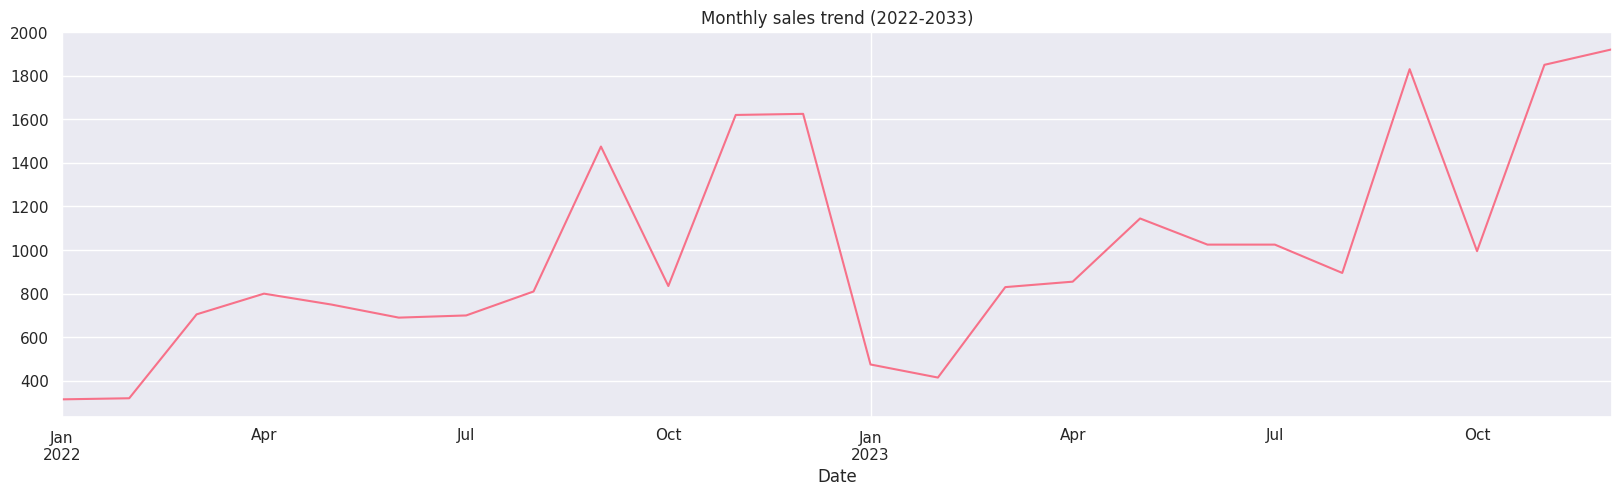

In [38]:
plt.figure(figsize=(20,5))
m.plot()
plt.title('Monthly sales trend (2022-2033)')
plt.show()

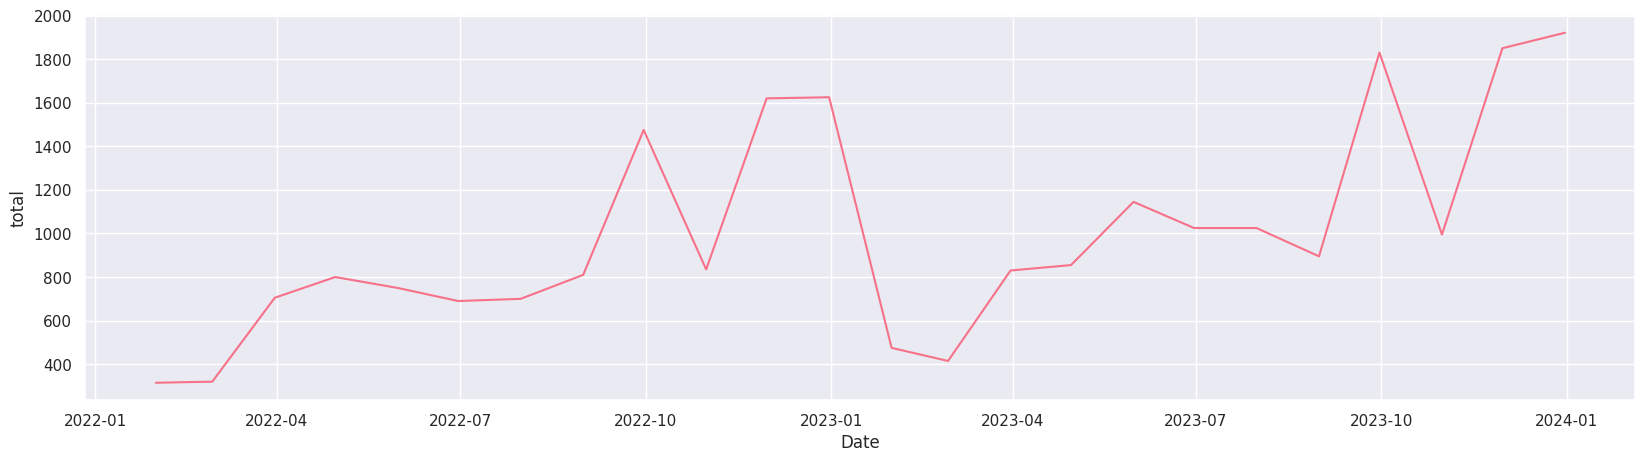

In [42]:
m2 = m.reset_index()
m2=m2.rename(columns={0:'total'})

plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='total', data=m2)
plt.show()

##### for the years 2022 and 2023, sales peaked at around january then dropping off rather quickly, slowly trending upwards then a suddenly spiking in sales by the start of october.

In [40]:
car.head(1)

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
2022-01-02,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
